# Análisis de Datos - Turismo Internacional en España 2019-2024

![](https://mediterrani.com/wp-content/webp-express/webp-images/uploads/2018/05/sector-turi%CC%81stico-en-espan%CC%83a.jpg.webp)

Estos conjuntos de datos consisten en fecha, lugar de origen y de destino, número de turistas, pernoctaciones y estancia media entre junio 2019 y octubre 2024.

|Nombre Variable| Rol|Tipo|Descripción|Unidades|Missing|
|---|---|---|---|---|---|
|año|	|int64|año del viaje||no|
|mes|	|int64|mes del viaje||no|
|provincia_destino|	|object|provincia al que acuden||no|
|continente_origen|	|object|continente de origen||no|
|pais_origen|	|object|país de origen||no|
|turistas|	|object	|número de turistas||no|
|pernoctaciones|	|object	|noches alojados||no|
|estancia_media|	|object	|estancia media||no|

## Preparación y Carga de datos

### Librerías

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy.stats as stats

## Carga de datos

In [40]:
data = pd.read_csv("turismo_receptor_provincia_pais.csv", sep=";", encoding='latin1', decimal=",")

In [41]:
df=data.copy()
df

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2019,7,A Coruña,América,Argentina,491.0,4075.0,8.3
1,2019,7,A Coruña,América,Brasil,717.0,3800.0,5.3
2,2019,7,A Coruña,América,Canadá,229.0,1511.0,6.6
3,2019,7,A Coruña,América,Chile,70.0,504.0,7.2
4,2019,7,A Coruña,América,Colombia,226.0,1740.0,7.7
...,...,...,...,...,...,...,...,...
190573,2024,10,Ávila,Europa,Suiza,164.0,1164.0,7.1
190574,2024,10,Ávila,Europa,Total Europa,8190.0,63138.0,7.7
190575,2024,10,Ávila,Total,Total,10138.0,76019.0,7.5
190576,2024,10,Ávila,África,Marruecos,257.0,3213.0,12.5


## Primera Exploración

In [5]:
df.head()

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2019,7,A Coruña,América,Argentina,491.0,4075.0,8.3
1,2019,7,A Coruña,América,Brasil,717.0,3800.0,5.3
2,2019,7,A Coruña,América,Canadá,229.0,1511.0,6.6
3,2019,7,A Coruña,América,Chile,70.0,504.0,7.2
4,2019,7,A Coruña,América,Colombia,226.0,1740.0,7.7


In [6]:
df.tail()

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
190573,2024,10,Ávila,Europa,Suiza,164.0,1164.0,7.1
190574,2024,10,Ávila,Europa,Total Europa,8190.0,63138.0,7.7
190575,2024,10,Ávila,Total,Total,10138.0,76019.0,7.5
190576,2024,10,Ávila,África,Marruecos,257.0,3213.0,12.5
190577,2024,10,Ávila,África,Total África,330.0,3595.0,10.9


In [7]:
df.shape

(190578, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190578 entries, 0 to 190577
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AÑO                190578 non-null  int64  
 1   MES                190578 non-null  int64  
 2   PROVINCIA_DESTINO  190578 non-null  object 
 3   CONTINENTE_ORIGEN  190578 non-null  object 
 4   PAIS_ORIGEN        190578 non-null  object 
 5   TURISTAS           190578 non-null  float64
 6   PERNOCTACIONES     190578 non-null  float64
 7   ESTANCIA_MEDIA     190493 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 11.6+ MB


In [9]:
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 0


In [10]:
print(df.isnull())

          AÑO    MES  PROVINCIA_DESTINO  CONTINENTE_ORIGEN  PAIS_ORIGEN  \
0       False  False              False              False        False   
1       False  False              False              False        False   
2       False  False              False              False        False   
3       False  False              False              False        False   
4       False  False              False              False        False   
...       ...    ...                ...                ...          ...   
190573  False  False              False              False        False   
190574  False  False              False              False        False   
190575  False  False              False              False        False   
190576  False  False              False              False        False   
190577  False  False              False              False        False   

        TURISTAS  PERNOCTACIONES  ESTANCIA_MEDIA  
0          False           False           False

In [12]:
any_missing = df.isna().any()
print(any_missing)

AÑO                  False
MES                  False
PROVINCIA_DESTINO    False
CONTINENTE_ORIGEN    False
PAIS_ORIGEN          False
TURISTAS             False
PERNOCTACIONES       False
ESTANCIA_MEDIA        True
dtype: bool


In [11]:
df.isnull().sum()

AÑO                   0
MES                   0
PROVINCIA_DESTINO     0
CONTINENTE_ORIGEN     0
PAIS_ORIGEN           0
TURISTAS              0
PERNOCTACIONES        0
ESTANCIA_MEDIA       85
dtype: int64

In [13]:
percentage_missing=(df.isnull().sum() / len(df) * 100).round(2)
print(percentage_missing)

AÑO                  0.00
MES                  0.00
PROVINCIA_DESTINO    0.00
CONTINENTE_ORIGEN    0.00
PAIS_ORIGEN          0.00
TURISTAS             0.00
PERNOCTACIONES       0.00
ESTANCIA_MEDIA       0.04
dtype: float64


In [15]:
print(df['AÑO'].unique())
print(df['MES'].unique())
print(df['PROVINCIA_DESTINO'].unique())

print(df['CONTINENTE_ORIGEN'].unique())

print(df['PAIS_ORIGEN'].unique())

[2019 2020 2021 2022 2023 2024]
[ 7  8  9 10 11 12  1  2  3  4  5  6]
['A Coruña' 'Albacete' 'Alicante/Alacant' 'Almería' 'Araba/Álava'
 'Asturias' 'Badajoz' 'Barcelona' 'Bizkaia' 'Burgos' 'Cantabria'
 'Castellón/Castelló' 'Ceuta' 'Ciudad Real' 'Cuenca' 'Cáceres' 'Cádiz'
 'Córdoba' 'Gipuzkoa' 'Girona' 'Granada' 'Guadalajara' 'Huelva' 'Huesca'
 'Illes Balears' 'Jaén' 'La Rioja' 'Las Palmas' 'León' 'Lleida' 'Lugo'
 'Madrid' 'Melilla' 'Murcia' 'Málaga' 'Navarra' 'Ourense' 'Palencia'
 'Pontevedra' 'Salamanca' 'Santa Cruz de Tenerife' 'Segovia' 'Sevilla'
 'Soria' 'Tarragona' 'Teruel' 'Toledo' 'Total Nacional'
 'Valencia/València' 'Valladolid' 'Zamora' 'Zaragoza' 'Ávila']
['América' 'Asia' 'Europa' 'Oceanía' 'Total' 'África']
['Argentina' 'Brasil' 'Canadá' 'Chile' 'Colombia'
 'Estados Unidos de América' 'México' 'Perú' 'Total América'
 'Total América del Norte' 'Total Centroamérica y Caribe'
 'Total Sudamérica' 'Uruguay' 'Venezuela' 'China' 'Corea'
 'Emiratos Árabes Unidos' 'Filipinas' 'Indi

## Limpieza y Preprocesado

In [16]:
df.isnull()

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
190573,False,False,False,False,False,False,False,False
190574,False,False,False,False,False,False,False,False
190575,False,False,False,False,False,False,False,False
190576,False,False,False,False,False,False,False,False


In [17]:
subdf= df[df.isna().any(axis=1)]
print(subdf)

        AÑO  MES PROVINCIA_DESTINO CONTINENTE_ORIGEN      PAIS_ORIGEN  \
28141  2020    4           Almería              Asia        Filipinas   
28142  2020    4           Almería              Asia            India   
28143  2020    4           Almería              Asia        Indonesia   
28144  2020    4           Almería              Asia       Total Asia   
28171  2020    4           Almería            Europa          Turquía   
...     ...  ...               ...               ...              ...   
31882  2020    5             Soria            Europa          Polonia   
31885  2020    5             Soria            Europa  República Checa   
32259  2020    5          Zaragoza            Europa          Andorra   
32264  2020    5          Zaragoza            Europa        Eslovenia   
32268  2020    5          Zaragoza            Europa          Hungría   

       TURISTAS  PERNOCTACIONES  ESTANCIA_MEDIA  
28141     852.0             0.0             NaN  
28142     126.0        

In [18]:
df_filled=df.fillna(0)
print(df_filled)

         AÑO  MES PROVINCIA_DESTINO CONTINENTE_ORIGEN   PAIS_ORIGEN  TURISTAS  \
0       2019    7          A Coruña           América     Argentina     491.0   
1       2019    7          A Coruña           América        Brasil     717.0   
2       2019    7          A Coruña           América        Canadá     229.0   
3       2019    7          A Coruña           América         Chile      70.0   
4       2019    7          A Coruña           América      Colombia     226.0   
...      ...  ...               ...               ...           ...       ...   
190573  2024   10             Ávila            Europa         Suiza     164.0   
190574  2024   10             Ávila            Europa  Total Europa    8190.0   
190575  2024   10             Ávila             Total         Total   10138.0   
190576  2024   10             Ávila            África     Marruecos     257.0   
190577  2024   10             Ávila            África  Total África     330.0   

        PERNOCTACIONES  EST

In [19]:
df_filled.isnull().sum()

AÑO                  0
MES                  0
PROVINCIA_DESTINO    0
CONTINENTE_ORIGEN    0
PAIS_ORIGEN          0
TURISTAS             0
PERNOCTACIONES       0
ESTANCIA_MEDIA       0
dtype: int64

In [64]:
df_filtrado = df[df['PROVINCIA_DESTINO'].isin(['Total Nacional']) | df['PAIS_ORIGEN'].isin(['TotaL'])]

print(df_filtrado)

         AÑO  MES PROVINCIA_DESTINO CONTINENTE_ORIGEN   PAIS_ORIGEN  TURISTAS  \
2840    2019    7    Total Nacional           América     Argentina   34780.0   
2841    2019    7    Total Nacional           América       Bahamas     100.0   
2842    2019    7    Total Nacional           América       Bolivia     960.0   
2843    2019    7    Total Nacional           América        Brasil   30995.0   
2844    2019    7    Total Nacional           América        Canadá   31929.0   
...      ...  ...               ...               ...           ...       ...   
190241  2024   10    Total Nacional            África  Total África  194014.0   
190242  2024   10    Total Nacional            África         Túnez    2764.0   
190243  2024   10    Total Nacional            África        Uganda     265.0   
190244  2024   10    Total Nacional            África        Zambia      53.0   
190245  2024   10    Total Nacional            África      Zimbabwe     466.0   

        PERNOCTACIONES  EST

In [65]:
df_filtrado = df[df['PAIS_ORIGEN'].isin(['TotaL'])]

print(df_filtrado)

Empty DataFrame
Columns: [AÑO, MES, PROVINCIA_DESTINO, CONTINENTE_ORIGEN, PAIS_ORIGEN, TURISTAS, PERNOCTACIONES, ESTANCIA_MEDIA]
Index: []


In [61]:
df = df_filled[~((df_filled['PAIS_ORIGEN'] == 'Total') | (df_filled['PROVINCIA_DESTINO'] == 'Total'))]
df

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2019,7,A Coruña,América,Argentina,491.0,4075.0,8.3
1,2019,7,A Coruña,América,Brasil,717.0,3800.0,5.3
2,2019,7,A Coruña,América,Canadá,229.0,1511.0,6.6
3,2019,7,A Coruña,América,Chile,70.0,504.0,7.2
4,2019,7,A Coruña,América,Colombia,226.0,1740.0,7.7
...,...,...,...,...,...,...,...,...
190572,2024,10,Ávila,Europa,Suecia,455.0,4550.0,10.0
190573,2024,10,Ávila,Europa,Suiza,164.0,1164.0,7.1
190574,2024,10,Ávila,Europa,Total Europa,8190.0,63138.0,7.7
190576,2024,10,Ávila,África,Marruecos,257.0,3213.0,12.5


In [44]:
try:
    df_filled.drop(['Total'], inplace=True)
except:
    print('ya estan borradas')
df

ya estan borradas


,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2019,7,A Coruña,América,Argentina,491.0,4075.0,8.3
1,2019,7,A Coruña,América,Brasil,717.0,3800.0,5.3
2,2019,7,A Coruña,América,Canadá,229.0,1511.0,6.6
3,2019,7,A Coruña,América,Chile,70.0,504.0,7.2
4,2019,7,A Coruña,América,Colombia,226.0,1740.0,7.7
...,...,...,...,...,...,...,...,...
190573,2024,10,Ávila,Europa,Suiza,164.0,1164.0,7.1
190574,2024,10,Ávila,Europa,Total Europa,8190.0,63138.0,7.7
190575,2024,10,Ávila,Total,Total,10138.0,76019.0,7.5
190576,2024,10,Ávila,África,Marruecos,257.0,3213.0,12.5


## Análisis Exploratorio de Datos (EDA)

### Análisis Univariado

In [20]:
df_filled.describe(include='object')

,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN
count,190578,190578,190578
unique,53,6,174
top,Total Nacional,Europa,Francia
freq,9424,98944,3392


In [21]:
df_filled[["TURISTAS", "PERNOCTACIONES", "ESTANCIA_MEDIA"]].describe()

,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
count,1.905780e+05,1.905780e+05,190578.000000
mean,1.183376e+04,8.676337e+04,7.804865
std,1.699974e+05,1.214866e+06,2.837796
min,3.000000e+01,0.000000e+00,0.000000
25%,8.100000e+01,5.920000e+02,5.900000
50%,2.740000e+02,2.068000e+03,7.400000
75%,1.316000e+03,1.022400e+04,9.100000
max,1.191263e+07,8.610039e+07,52.300000


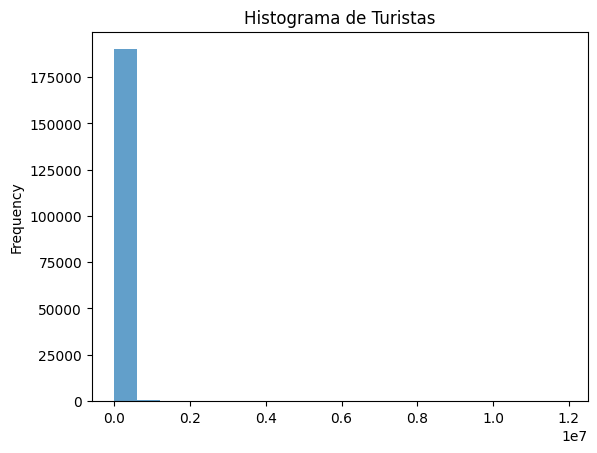

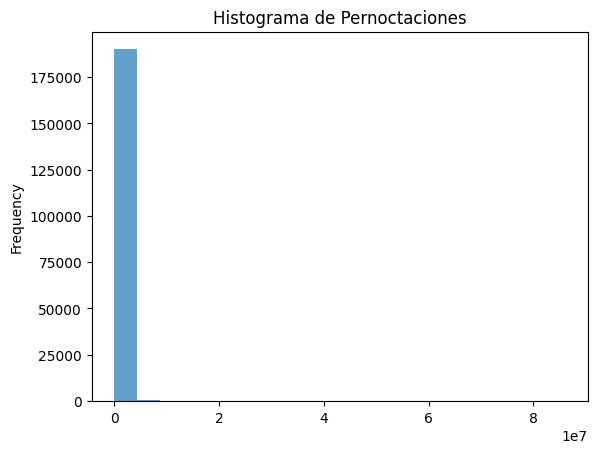

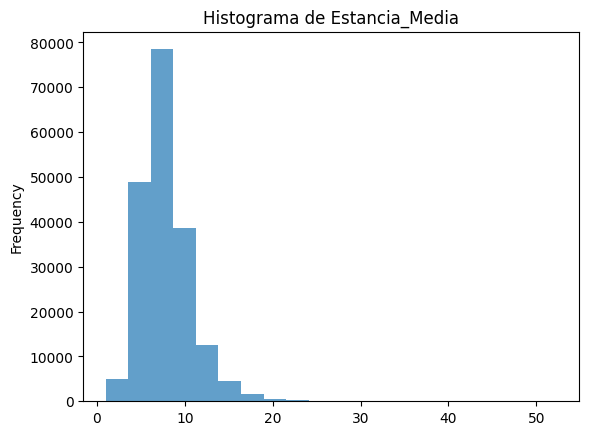

In [42]:
df['TURISTAS'].plot(kind='hist', bins=20, alpha=0.7, title='Histograma de Turistas')
plt.show()

df['PERNOCTACIONES'].plot(kind='hist', bins=20, alpha=0.7, title='Histograma de Pernoctaciones')
plt.show()

df['ESTANCIA_MEDIA'].plot(kind='hist', bins=20, alpha=0.7, title='Histograma de Estancia_Media')
plt.show()

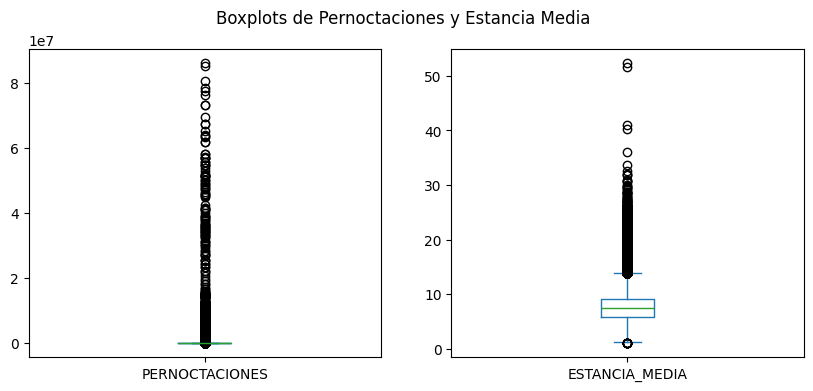

In [36]:
df[['PERNOCTACIONES', 'ESTANCIA_MEDIA']].plot(kind='box', subplots=True, layout=(1,2), figsize=(10,4), title='Boxplots de Pernoctaciones y Estancia Media')
plt.show()

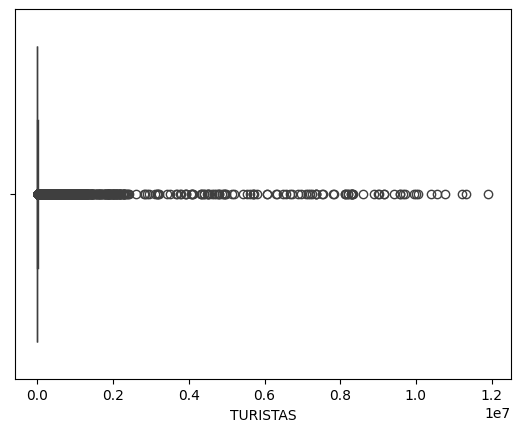

In [ ]:
sns.boxplot(x=df['TURISTAS'])
plt.show()

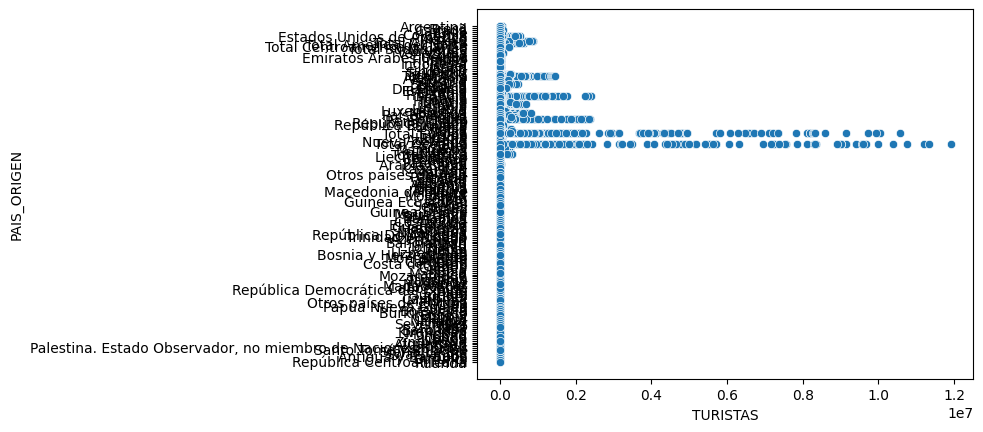

In [23]:
sns.scatterplot(data=df, x='TURISTAS', y='PAIS_ORIGEN')
plt.show()